# Introdução à Manipulação de Dados com PANDAS #

        O que é Pandas? 

Pandas é uma biblioteca Python para análise de dados organizando-os como uma planilha. 
Essa biblioteca cria dois tipos novos de dado no Python:  

DataFrame, estrutura de dados bidimensional - parecida com uma tabela de excel.
DataSerie, estrutura unidimensional - como uma coluna do excel

Um DataFrame Pandas também pode ser pensado como um dicionário ou coleção de séries


In [165]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsvn'
%matplotlib inline

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv',
                 sep = '\t')

Como o dataraw está separado por TAB, precisamos usar o parâmetro '\t'

In [31]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [34]:
df.shape

(1704, 6)

In [35]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [36]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


#### Tipos de Objetos ####
Pandas	Python	Descrição &nbsp;
object	string	"texto" &nbsp;
int64	int	números &nbsp;
float64	float	decimal &nbsp;
datetime64	datetime	data e hora &nbsp;


In [38]:
df.country.head(5)

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

Aqui eu chamo a coluna Country e peço para ver as cinco primeiras posições. Posso também usar o df['countr'].head(5) para isso. Como estou chamando apenas uma coluna, posso chamar sem o []

In [46]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

Quando eu utilizo o loc eu estou pedindo que venha todas as informações referentes aquela posição no dataframe. No exemplo acima ele organizou todas as informações da posição 0.

In [47]:
df.loc[1298]

country      Sao Tome and Principe
continent                   Africa
year                          1962
lifeExp                     51.893
pop                          65345
gdpPercap                  1071.55
Name: 1298, dtype: object

In [48]:
df.loc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [50]:
df.iloc[[1,11,21]]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
21,Albania,Europe,1997,72.950,3428038,3193.054604


A diferença entre o .loc e o i.loc é que o loc procura  apenas por linha (index), precisamso colocar o nome da coluna. Enquanto que o i.loc procura  por linha e coluna como o exemplo abaixo:

In [52]:
df.loc[42,'country']

'Angola'

In [53]:
df.loc[42,0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [54]:
df.iloc[42,0]

'Angola'

In [57]:
df.iloc[[0,99,999],[0,3,5]] #escolhendo diferentes colunas e linhas

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [63]:
df.country.unique() #quais os valores que aparecem na coluna?

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [69]:
df.head(12) #para olhar de quanto em quanto tempo temos os dados

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [86]:
df.loc[11,'year'] - df.loc[0,'year'] # quero saber o período de abrangência da coleta de dados.

55

In [89]:
df.describe() # usamos esse atributo para vermos a estatística descritiva e termos
              #   uma idéia de como os dados se comportam

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [72]:
df.groupby('year')['lifeExp'].mean() # agrupando por "tuplas" o ano e a lista de expectativa de vida.

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [82]:
df.groupby(['year','continent']) ['lifeExp'].mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

O atributo groupby agrupa conforme o parâmetro que passa para ele. No caso, queremos agrupar por ano, continente verificando a média da expectativa de vida.

In [90]:
df.groupby('continent')['country'].nunique() # soma todos os países dentro do rótulo continente

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [92]:
df.groupby('continent')['country'].value_counts() # lista países + qtde por continente

continent  country                 
Africa     Algeria                     12
           Angola                      12
           Benin                       12
           Botswana                    12
           Burkina Faso                12
           Burundi                     12
           Cameroon                    12
           Central African Republic    12
           Chad                        12
           Comoros                     12
           Congo, Dem. Rep.            12
           Congo, Rep.                 12
           Cote d'Ivoire               12
           Djibouti                    12
           Egypt                       12
           Equatorial Guinea           12
           Eritrea                     12
           Ethiopia                    12
           Gabon                       12
           Gambia                      12
           Ghana                       12
           Guinea                      12
           Guinea-Bissau               1

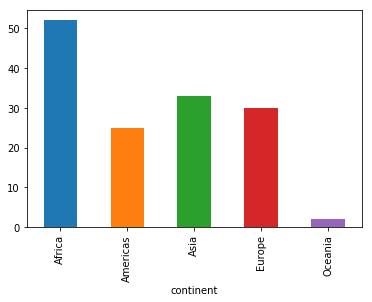

In [104]:
df.groupby('continent')['country'].nunique().plot.bar()

In [96]:
df.country.nunique() 

142

In [101]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

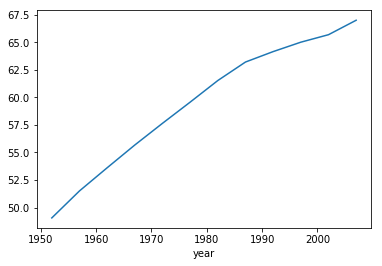

In [127]:
df.groupby('year')['lifeExp'].mean().plot()

In [121]:
a = df[df['lifeExp'] <= 50]
print(a)

                 country continent  year  lifeExp       pop    gdpPercap
0            Afghanistan      Asia  1952   28.801   8425333   779.445314
1            Afghanistan      Asia  1957   30.332   9240934   820.853030
2            Afghanistan      Asia  1962   31.997  10267083   853.100710
3            Afghanistan      Asia  1967   34.020  11537966   836.197138
4            Afghanistan      Asia  1972   36.088  13079460   739.981106
5            Afghanistan      Asia  1977   38.438  14880372   786.113360
6            Afghanistan      Asia  1982   39.854  12881816   978.011439
7            Afghanistan      Asia  1987   40.822  13867957   852.395945
8            Afghanistan      Asia  1992   41.674  16317921   649.341395
9            Afghanistan      Asia  1997   41.763  22227415   635.341351
10           Afghanistan      Asia  2002   42.129  25268405   726.734055
11           Afghanistan      Asia  2007   43.828  31889923   974.580338
24               Algeria    Africa  1952   43.077  

In [131]:
df1 = df.set_index('country')
df1.head(2)

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,1952,28.801,8425333,779.445314
Afghanistan,Asia,1957,30.332,9240934,820.853030


In [150]:
a=df1.loc['Brazil']
print(a)

        continent  year  lifeExp        pop    gdpPercap
country                                                 
Brazil   Americas  1952   50.917   56602560  2108.944355
Brazil   Americas  1957   53.285   65551171  2487.365989
Brazil   Americas  1962   55.665   76039390  3336.585802
Brazil   Americas  1967   57.632   88049823  3429.864357
Brazil   Americas  1972   59.504  100840058  4985.711467
Brazil   Americas  1977   61.489  114313951  6660.118654
Brazil   Americas  1982   63.336  128962939  7030.835878
Brazil   Americas  1987   65.205  142938076  7807.095818
Brazil   Americas  1992   67.057  155975974  6950.283021
Brazil   Americas  1997   69.388  168546719  7957.980824
Brazil   Americas  2002   71.006  179914212  8131.212843
Brazil   Americas  2007   72.390  190010647  9065.800825


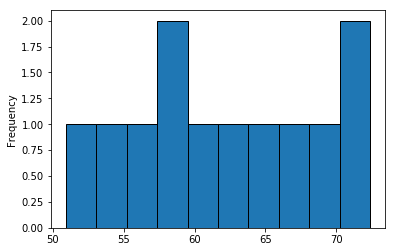

In [163]:
a['lifeExp'].plot.hist(edgecolor='black')